<a href="https://colab.research.google.com/github/vkodedal/DeepLearning/blob/master/MNIST_Sequential_Pytorch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import torch
import torchvision

In [0]:
import numpy as np
import matplotlib.pyplot as plt

In [0]:
tf = torchvision.transforms.Compose([torchvision.transforms.ToTensor()])

In [0]:
train_ds = torchvision.datasets.MNIST(root='./data', train=True, download=True, transform=tf)

In [0]:
bs=16
lr = 1e-2
loss_fn = torch.nn.CrossEntropyLoss()

In [0]:
train_dl = torch.utils.data.DataLoader(train_ds, batch_size=bs, shuffle=True, num_workers=1)

In [0]:
train_iter = iter(train_dl)

In [0]:
img, label = train_iter.next()

In [89]:
img.shape, label.shape

(torch.Size([16, 1, 28, 28]), torch.Size([16]))

In [0]:
def showimage(x):
  x_np = x.numpy()
  x_img = x_np.transpose(1,2,0)
  plt.imshow(x_img)

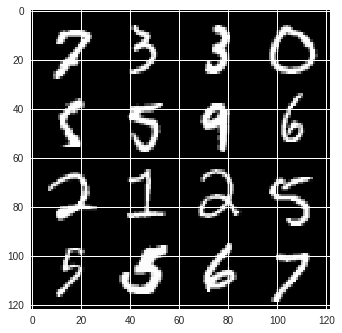

In [124]:
showimage(torchvision.utils.make_grid(img,nrow=4))

In [99]:
label

tensor([7, 3, 3, 0, 5, 5, 9, 6, 2, 1, 2, 5, 5, 5, 6, 7])

In [0]:
model = torch.nn.Sequential(torch.nn.Linear(28*28,512), torch.nn.ReLU(), 
                            torch.nn.Linear(512, 256), torch.nn.ReLU(), 
                            torch.nn.Linear(256, 128), torch.nn.ReLU(), 
                            torch.nn.Linear(128, 10), torch.nn.Softmax())

In [0]:
opt = torch.optim.Adam(params=model.parameters(), lr=lr)

In [103]:
y_pred = model(img.view(-1, 784))

/usr/local/lib/python3.6/dist-packages/torch/nn/modules/container.py:92: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  input = module(input)


In [104]:
y_pred.shape

torch.Size([16, 10])

In [0]:
loss = loss_fn(y_pred.view(-1,10), label)

In [106]:
loss

tensor(2.3006, grad_fn=<NllLossBackward>)

In [0]:
epochs = 2

In [109]:
for e in range(epochs):
  print('Start of epoch - ', e)
  run_loss = 0.
  for i, data in enumerate(train_dl, 0):
    opt.zero_grad()
    x_imgs, y_labels = data
    y_preds = model(x_imgs.view(-1, 784)/255.)
    loss = loss_fn(y_preds.view(-1, 10), y_labels)
    loss.backward()
    opt.step()
    
    run_loss += loss.item()
    if i%2000 == 0:
      print('Loss ', run_loss/2000)
      run_loss =0.

Start of epoch -  0
Loss  0.0008358287811279296


/usr/local/lib/python3.6/dist-packages/torch/nn/modules/container.py:92: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  input = module(input)


Loss  1.6874756948351861
Start of epoch -  1
Loss  0.0008243497610092163
Loss  1.673899600327015


In [0]:
testimg, testlabel = train_iter.next()

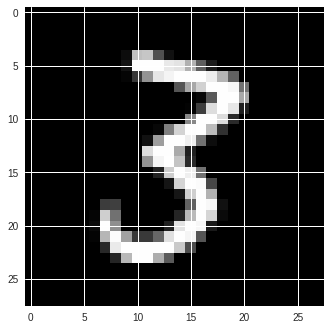

In [135]:
showimage(torchvision.utils.make_grid(testimg[1], nrow=1))

In [136]:
testimg[1].shape

torch.Size([1, 28, 28])

In [137]:
test_pred = model(testimg[1].view(-1, 784))

/usr/local/lib/python3.6/dist-packages/torch/nn/modules/container.py:92: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  input = module(input)


In [138]:
type(test_pred)

torch.Tensor

In [139]:
np.argmax(test_pred.detach().numpy().flatten())

3

In [0]:
test_ds = torchvision.datasets.MNIST(root='./data', train=False, download=False, transform=tf)

In [0]:
test_dl = torch.utils.data.DataLoader(test_ds, batch_size=bs, shuffle=False)

In [0]:
test_iter = iter(test_dl)

In [0]:
test_images, test_labels = test_iter.next()

In [172]:
test_preds = model(test_images.view(-1, 784)/255.)

/usr/local/lib/python3.6/dist-packages/torch/nn/modules/container.py:92: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  input = module(input)


In [173]:
test_preds.shape

torch.Size([16, 10])

In [0]:
corr=0 
wrong=0

for i in range(bs):
  if (np.argmax(test_preds[i].detach().numpy().flatten()) == test_labels[i]):
    corr +=1
  else:
    wrong +=1


In [175]:
print('accuracy ', corr*100/bs)

accuracy  81.25
